# 8장. 텍스트빈도분석 - 1.영어단어분석

### 영어 단어 분석에 필요한 패키지 준비

In [45]:
# import pandas as pd
# import glob
# import re
# from functools import reduce

# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer

# from collections import Counter

# import matplotlib.pyplot as plt
# from wordcloud import WordCloud, STOPWORDS

In [46]:
# import nltk     # nltk.download() 를 하기위해, import 함.

In [47]:
# nltk.download()  # 최초 한번만 설치: download 창이 뜨면, 모두 선택하고 [Download] 버튼 클릭!

# 1. 데이터 준비

### 1-1. 파일 병합

### - ☺데이터를 다운 받은 시점에 따라 검색결과가 달라지므로, 책에 있는 결과 화면과 다를수 있습니다.☺ -

In [48]:
import glob
all_files = glob.glob('src/8장/myCabinetExcelData*.xls')

all_files 

['src/8장\\myCabinetExcelData (1).xls',
 'src/8장\\myCabinetExcelData (10).xls',
 'src/8장\\myCabinetExcelData (2).xls',
 'src/8장\\myCabinetExcelData (3).xls',
 'src/8장\\myCabinetExcelData (4).xls',
 'src/8장\\myCabinetExcelData (5).xls',
 'src/8장\\myCabinetExcelData (6).xls',
 'src/8장\\myCabinetExcelData (7).xls',
 'src/8장\\myCabinetExcelData (8).xls',
 'src/8장\\myCabinetExcelData (9).xls']

In [49]:
import pandas as pd

all_files_data = [] 
for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)

all_files_data[0] 

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Architecting Time-Critical Big-Data Systems,"Basanta-Val, P.; Audsley, N. C.; Wellings, A. ...",unknown,2016
1,NaN,2,Computation migration: a new approach to execu...,"Nunes, Rickey T. P.; Deshpande, Santosh L.",Inderscience,2018
2,NaN,3,A trust-based crowdfunding campaign marketing ...,"Baah-Peprah, Prince; Shneor, Rotem",Inderscience,2021
3,NaN,4,Scientific Training in the Era of Big Data: A ...,unknown,Mary Ann Leibert,2017
4,NaN,5,The Structural Consequences of Big Data-Driven...,unknown,Mary Ann Leibert,2017
...,...,...,...,...,...,...
95,NaN,96,Big Data 2.0: Cataclysm or Catalyst?,unknown,Mary Ann Leibert,2014
96,NaN,97,Why Big Data = Big Deal,unknown,Mary Ann Leibert,2014
97,NaN,98,A comparison on scalability for batch big data...,"García-Gil, Diego; Ramírez-Gallego, Sergio; Ga...",Springer Nature,2017
98,NaN,99,Big Data for Social Good,unknown,Mary Ann Leibert,2015


In [50]:
all_files_data_concat = pd.concat(all_files_data, ignore_index=True)

all_files_data_concat 

,Unnamed: 0,번호,제목,저자,출판사,출판일,참고문헌양식
0,NaN,1.0,Architecting Time-Critical Big-Data Systems,"Basanta-Val, P.; Audsley, N. C.; Wellings, A. ...",unknown,2016.0,NaN
1,NaN,2.0,Computation migration: a new approach to execu...,"Nunes, Rickey T. P.; Deshpande, Santosh L.",Inderscience,2018.0,NaN
2,NaN,3.0,A trust-based crowdfunding campaign marketing ...,"Baah-Peprah, Prince; Shneor, Rotem",Inderscience,2021.0,NaN
3,NaN,4.0,Scientific Training in the Era of Big Data: A ...,unknown,Mary Ann Leibert,2017.0,NaN
4,NaN,5.0,The Structural Consequences of Big Data-Driven...,unknown,Mary Ann Leibert,2017.0,NaN
...,...,...,...,...,...,...,...
996,NaN,96.0,`Big data' looks best in 3D,unknown,REED BUSINESS PUBLISHING,2013.0,NaN
997,NaN,97.0,Big Data: The Next Big Thing in Innovation,"Gobble, MaryAnne M.",INDUSTRIAL RESEARCH INSTITUTE INC,2013.0,NaN
998,NaN,98.0,Big data: Are large prospective randomized tri...,"Hudis, Clifford A.","Elsevier Science B.V., Amsterdam",2015.0,NaN
999,NaN,99.0,"Big Data's promise: messy, like us","Karlgaard, R.",FORBES MAGAZINE,2013.0,NaN


In [51]:
all_files_data_concat.to_csv('src/8장/riss_bigdata.csv', 
                                 encoding='utf-8', index = False)

### 1-2. 데이터 전처리 (Pre-processing)

In [52]:
all_title = all_files_data_concat['제목']

all_title

0             Architecting Time-Critical Big-Data Systems
1       Computation migration: a new approach to execu...
2       A trust-based crowdfunding campaign marketing ...
3       Scientific Training in the Era of Big Data: A ...
4       The Structural Consequences of Big Data-Driven...
                              ...                        
996                           `Big data' looks best in 3D
997            Big Data: The Next Big Thing in Innovation
998     Big data: Are large prospective randomized tri...
999                    Big Data's promise: messy, like us
1000        Big data: lessons for employers and employees
Name: 제목, Length: 1001, dtype: object

In [53]:
# print(EnWordsToken)
# print(EnWordsTokenStop)
# print(EnWordsTokenStopLemma)

In [54]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

stopWords = set(stopwords.words("english"))
lemma = WordNetLemmatizer()
lemma

words = []  
for title in all_title:
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title)) 
    EnWordsToken = word_tokenize(EnWords.lower())    
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]   
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]    
    words.append(EnWordsTokenStopLemma)
    
print(words)  

[['architecting', 'time', 'critical', 'big', 'data', 'system'], ['computation', 'migration', 'new', 'approach', 'execute', 'big', 'data', 'bioinformatics', 'workflow'], ['trust', 'based', 'crowdfunding', 'campaign', 'marketing', 'framework', 'theoretical', 'underpinnings', 'big', 'data', 'analytics', 'practice'], ['scientific', 'training', 'era', 'big', 'data', 'new', 'pedagogy', 'graduate', 'education'], ['structural', 'consequence', 'big', 'data', 'driven', 'education'], ['role', 'teamwork', 'analysis', 'big', 'data', 'study', 'visual', 'analytics', 'box', 'office', 'prediction'], ['data', 'science', 'relationship', 'big', 'data', 'data', 'driven', 'decision', 'making'], ['big', 'scholarly', 'data', 'survey'], ['author', 'response', 'gong', 'comment', 'data', 'science', 'relationship', 'big', 'data', 'data', 'driven', 'decision', 'making'], ['sport', 'analytics', 'era', 'big', 'data', 'moving', 'toward', 'next', 'frontier'], ['diversity', 'big', 'data', 'review'], ['mapping', 'essent

In [55]:
from functools import reduce

words2 = list(reduce(lambda x, y: x+y,words))
print(words2)  

['architecting', 'time', 'critical', 'big', 'data', 'system', 'computation', 'migration', 'new', 'approach', 'execute', 'big', 'data', 'bioinformatics', 'workflow', 'trust', 'based', 'crowdfunding', 'campaign', 'marketing', 'framework', 'theoretical', 'underpinnings', 'big', 'data', 'analytics', 'practice', 'scientific', 'training', 'era', 'big', 'data', 'new', 'pedagogy', 'graduate', 'education', 'structural', 'consequence', 'big', 'data', 'driven', 'education', 'role', 'teamwork', 'analysis', 'big', 'data', 'study', 'visual', 'analytics', 'box', 'office', 'prediction', 'data', 'science', 'relationship', 'big', 'data', 'data', 'driven', 'decision', 'making', 'big', 'scholarly', 'data', 'survey', 'author', 'response', 'gong', 'comment', 'data', 'science', 'relationship', 'big', 'data', 'data', 'driven', 'decision', 'making', 'sport', 'analytics', 'era', 'big', 'data', 'moving', 'toward', 'next', 'frontier', 'diversity', 'big', 'data', 'review', 'mapping', 'essential', 'urban', 'land', 

# 2. 데이터 탐색

## 2-1. 단어 빈도 탐색

In [56]:
from collections import Counter

count = Counter(words2)
print( count )

Counter({'data': 1130, 'big': 1019, 'nan': 101, 'analytics': 100, 'analysis': 96, 'based': 90, 'system': 64, 'approach': 57, 'driven': 53, 'using': 45, 'application': 44, 'model': 40, 'learning': 40, 'issue': 38, 'framework': 36, 'science': 33, 'new': 31, 'challenge': 31, 'platform': 31, 'cloud': 31, 'health': 31, 'era': 28, 'algorithm': 28, 'special': 27, 'research': 26, 'mining': 26, 'management': 26, 'network': 25, 'processing': 24, 'study': 23, 'paper': 23, 'performance': 23, 'earth': 23, 'energy': 23, 'time': 22, 'call': 22, 'distributed': 22, 'machine': 22, 'process': 22, 'method': 21, 'perspective': 21, 'computing': 21, 'optimization': 21, 'use': 20, 'opportunity': 20, 'technology': 20, 'intelligence': 20, 'business': 20, 'der': 20, 'world': 20, 'smart': 20, 'review': 19, 'efficient': 19, 'information': 19, 'service': 19, 'making': 18, 'social': 18, 'real': 18, 'future': 18, 'development': 17, 'security': 17, 'online': 17, 'small': 16, 'scalable': 16, 'china': 16, 'survey': 15, 

In [57]:
word_count = dict()

for tag, counts in count.most_common(50):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

data : 1130
big : 1019
nan : 101
analytics : 100
analysis : 96
based : 90
system : 64
approach : 57
driven : 53
using : 45
application : 44
model : 40
learning : 40
issue : 38
framework : 36
science : 33
new : 31
challenge : 31
platform : 31
cloud : 31
health : 31
era : 28
algorithm : 28
special : 27
research : 26
mining : 26
management : 26
network : 25
processing : 24
study : 23
paper : 23
performance : 23
earth : 23
energy : 23
time : 22
call : 22
distributed : 22
machine : 22
process : 22
method : 21
perspective : 21
computing : 21
optimization : 21
use : 20
opportunity : 20
technology : 20
intelligence : 20
business : 20
der : 20
world : 20


In [58]:
print( sorted(word_count, reverse = True) )

['world', 'using', 'use', 'time', 'technology', 'system', 'study', 'special', 'science', 'research', 'processing', 'process', 'platform', 'perspective', 'performance', 'paper', 'optimization', 'opportunity', 'new', 'network', 'nan', 'model', 'mining', 'method', 'management', 'machine', 'learning', 'issue', 'intelligence', 'health', 'framework', 'era', 'energy', 'earth', 'driven', 'distributed', 'der', 'data', 'computing', 'cloud', 'challenge', 'call', 'business', 'big', 'based', 'approach', 'application', 'analytics', 'analysis', 'algorithm']


### 검색어로 사용한 big'과 'data' 빈도가 압도적으로 많으므로, 이를 제거한다.

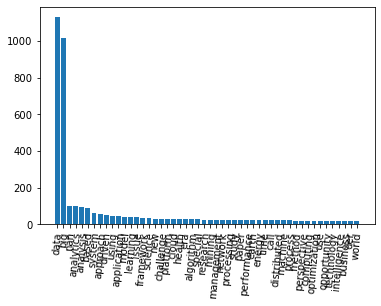

In [59]:
import matplotlib.pyplot as plt

sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)

plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = '85')
plt.show()

## 2-2 단어 빈도 히스토그램

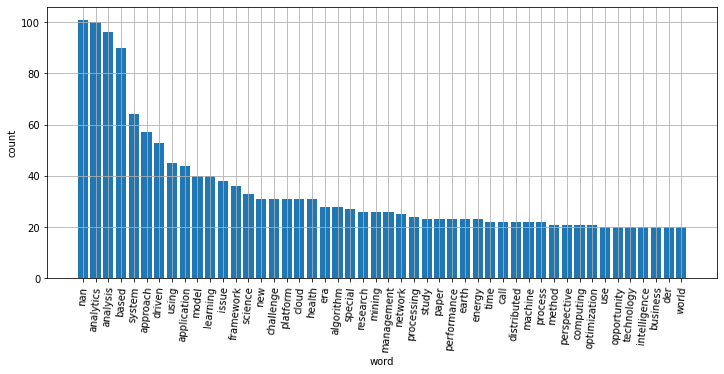

In [84]:
# del word_count['big']
# del word_count['data']

plt.figure(figsize=(12,5))
plt.xlabel("word")
plt.ylabel("count")
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), sorted_Keys, rotation='85')

plt.show()

# 3. 분석 모델 구축 및 결과 시각화

## 3-1. 연도별 데이터 수

In [67]:
all_files_data_concat['doc_count'] = 0
print (all_files_data_concat.head() )

summary_year = all_files_data_concat.groupby('출판일', as_index=False)['doc_count'].count()
summary_year

   Unnamed: 0   번호                                                 제목  \
0         NaN  1.0        Architecting Time-Critical Big-Data Systems   
1         NaN  2.0  Computation migration: a new approach to execu...   
2         NaN  3.0  A trust-based crowdfunding campaign marketing ...   
3         NaN  4.0  Scientific Training in the Era of Big Data: A ...   
4         NaN  5.0  The Structural Consequences of Big Data-Driven...   

                                                  저자               출판사  \
0  Basanta-Val, P.; Audsley, N. C.; Wellings, A. ...           unknown   
1         Nunes, Rickey T. P.; Deshpande, Santosh L.      Inderscience   
2                 Baah-Peprah, Prince; Shneor, Rotem      Inderscience   
3                                            unknown  Mary Ann Leibert   
4                                            unknown  Mary Ann Leibert   

      출판일 참고문헌양식  doc_count  
0  2016.0    NaN          0  
1  2018.0    NaN          0  
2  2021.0    NaN          

,출판일,doc_count
0,1999.0,2
1,2003.0,1
2,2004.0,2
3,2011.0,3
4,2012.0,21
5,2013.0,50
6,2014.0,98
7,2015.0,79
8,2016.0,119
9,2017.0,119


In [ ]:
plt.figure(figsize=(12,5))
plt.xlabel("year")
plt.ylabel("doc-count")
plt.grid(True)

plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']])

plt.show()

## 3-2. 워드클라우드

In [ ]:
word_count

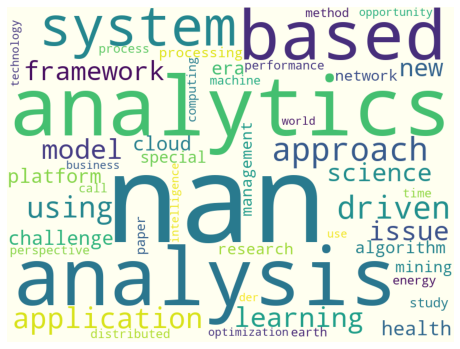

In [78]:
from wordcloud import WordCloud, STOPWORDS
    
stopwords=set(STOPWORDS)

wc=WordCloud(background_color='ivory', stopwords=stopwords, width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

cloud.to_file("src/8장/riss_bigdata_wordCloud.jpg")

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()